**Data Description:**

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

**Domain:**

Material manufacturing

**Context:**

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

****

**Attribute Information:**

● Cement : measured in kg in a m3 mixture<br>
● Blast : measured in kg in a m3 mixture<br>
● Fly ash : measured in kg in a m3 mixture<br>
● Water : measured in kg in a m3 mixture<br>
● Superplasticizer : measured in kg in a m3 mixture<br>
● Coarse Aggregate : measured in kg in a m3 mixture<br>
● Fine Aggregate : measured in kg in a m3 mixture<br>
● Age : day (1~365)<br>
● Concrete compressive strength measured in MPa<br>

Learning Outcomes:

● Exploratory Data Analysis<br>
● Building ML models for regression<br>
● Hyper parameter tuning

# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Read Data

In [2]:
df = pd.read_csv('concrete.csv')

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# 3. Understanding Data

## a. Univariate Analysis:

data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

In [4]:
df.shape

(1030, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<font color=blue>Dataset has total **1030 observations**</font><br>
<font color=blue>All attribute is **Numeric type**</font><br>
<font color=blue>All attribute is having 1030 **non null** observations. </font><br>

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


<font color=blue>
    Attribute Information-<br><br>
    Cement:<br><font color=black> Range:(102,540), Median:272.9, Mean:281.168, Std:104.5<br>
    Difference between mean and median is very less, so distribution would be gaussian<br>
    Based on Min value, Median and Max value, the data doesn't seem to have outlier</font><br><br>
    Slag:<br><font color=black> Range:(0,359.4), Median:22, Mean:73.895, Std:86.27<br>
    Mean is very higher than Median, the distribution is positively skewed<br>
    Based on Min value, Median and Max value, the data seems to have outlier</font><br><br>
    Ash:<br><font color=black> Range:(0,200.1), Median:0, Mean:54.188, Std:63.99<br>
    Mean is very higher than Median, the distribution is positively skewed<br>
    Based on Min value, Median and Max value, the data doesn't seem to have outlier</font><br><br>
    Water:<br><font color=black> Range:(121.8,247), Median:185, Mean:181.567, Std:21.35<br>
    Difference between mean and median is very less, so distribution would be gaussian<br>
    Based on Min value, Median and Max value, the data seems to have outlier</font><br><br>
    Superplastic:<br><font color=black> Range:(0,32.2), Median:6.4, Mean:6.204, Std:5.97<br>
    Difference between mean and median is very less, so distribution would be gaussian<br>
    Based on Min value, Median and Max value, the data seems to have outlier</font><br><br>
    Coarseagg:<br><font color=black> Range:(801,1145), Median:968, Mean:972.918, Std:77.75<br>
    Difference between mean and median is very less, so distribution would be gaussian<br>
    Based on Min value, Median and Max value, the data doesn't seem to have outlier</font><br><br>
    Fineagg:<br><font color=black> Range:(594,992.6), Median:779.5, Mean:773.580, Std:80.17<br>
    Difference between mean and median is very less, so distribution would be gaussian<br>
    Based on Min value, Median and Max value, the data seems to have outlier</font><br><br>
    Age:<br><font color=black> Range:(1,365), Median:28, Mean:45.662, Std:63.17<br>
    Mean is very higher than Median, the distribution is positively skewed<br>
    Based on Min value, Median and Max value, the data seems to have outlier</font><br><br>
</font>

In [7]:
import itertools

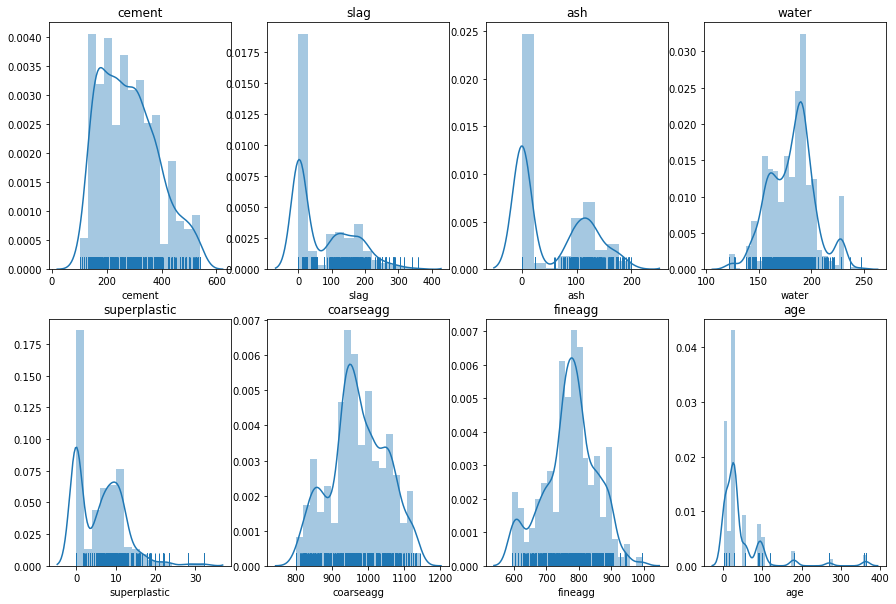

In [9]:
cols = [i for i in df.columns if i not in 'strength']
length = len(cols)
fig = plt.figure(figsize=(15,10))

for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(2,4,j+1)
    ax = sns.distplot(df[i],rug=True)
    plt.title(i)

<font color=blue>Above Distribution plots confirms our observations(which we came up using mean, median, range values) on skewness and outliers about the data</font>

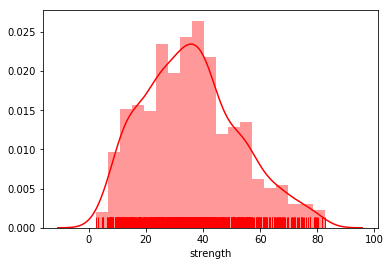

In [10]:
sns.distplot(df['strength'],color='red',rug=True)

<font color=blue>Distribution of our target attribute looks gaussian</font>

cement              AxesSubplot(0.125,0.71587;0.227941x0.16413)
slag             AxesSubplot(0.398529,0.71587;0.227941x0.16413)
ash              AxesSubplot(0.672059,0.71587;0.227941x0.16413)
water              AxesSubplot(0.125,0.518913;0.227941x0.16413)
superplastic    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
coarseagg       AxesSubplot(0.672059,0.518913;0.227941x0.16413)
fineagg            AxesSubplot(0.125,0.321957;0.227941x0.16413)
age             AxesSubplot(0.398529,0.321957;0.227941x0.16413)
strength        AxesSubplot(0.672059,0.321957;0.227941x0.16413)
dtype: object

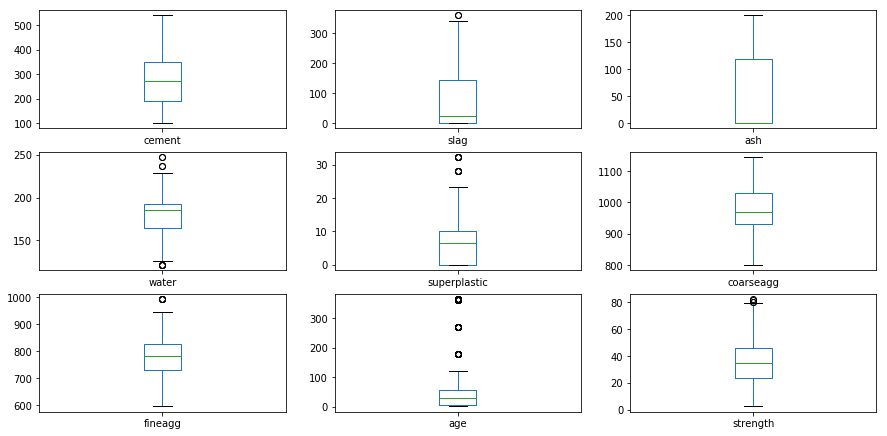

In [11]:
df.plot(kind='box', subplots=True, layout=(4,3), figsize=(15,10))

<font color=blue>Above Box plot confirms our observations(which we came up using mean, median, range values) on skewness and outliers about the data</font>

## b. Multivariate analysis:

Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes

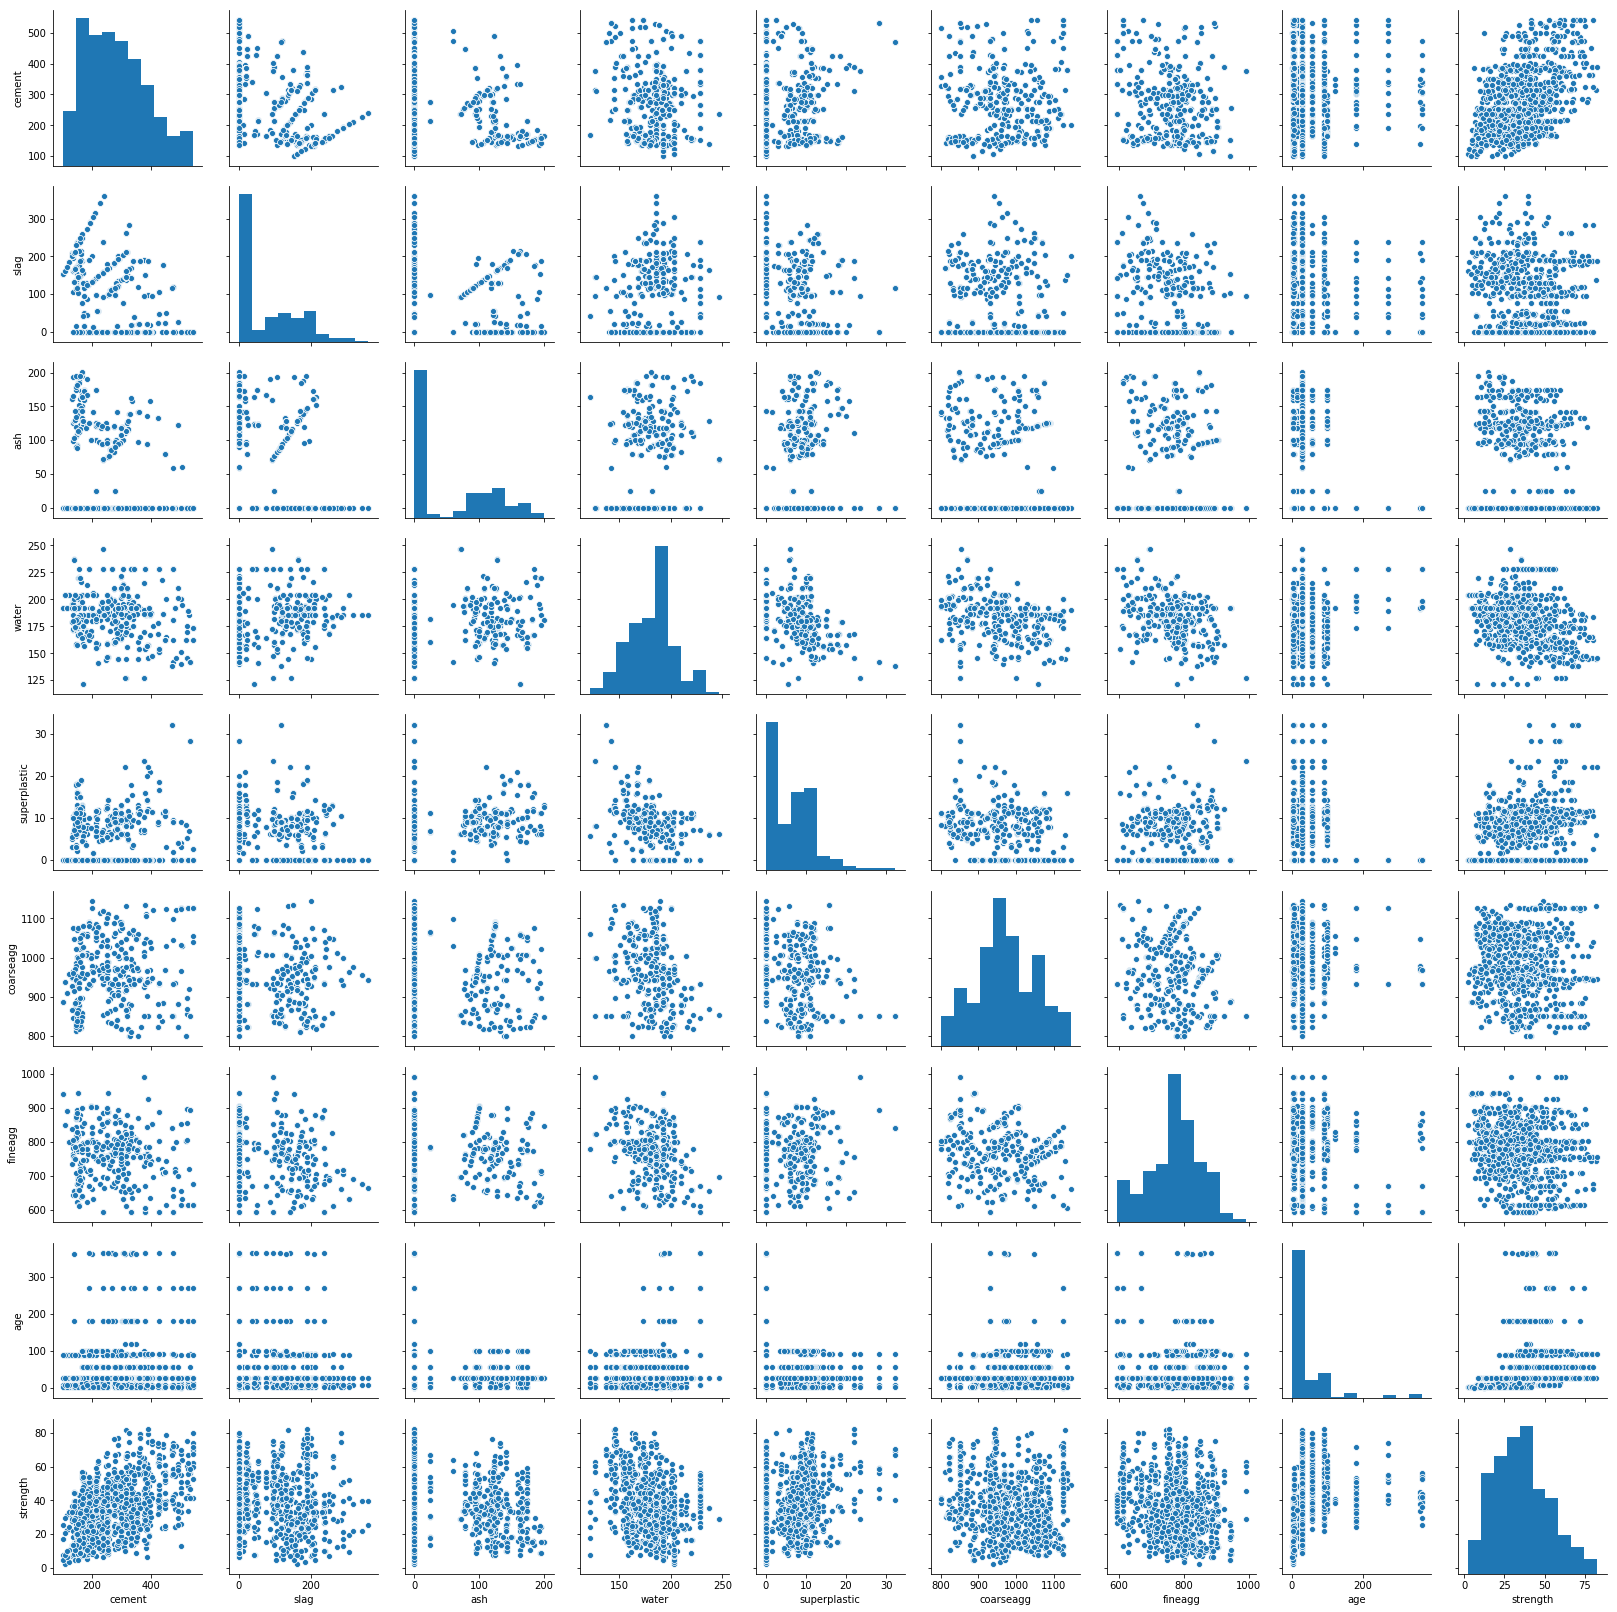

In [12]:
sns.pairplot(df)

<font color='blue'>Pairplot provides visualization for both univariate and bivariate analysis.<br>
Diagonal provides visualization for univariate analysis and we can look at either top or bottom part of plots from the diagonal to visualizate our dataset for bivariate analysis.<br>
We have already covered univariate analysis, let's look into bivariate analysis.<br></font>
<br>
<font color='green'>    1. slag, ash has negative correlation with cement.<br></font>
<font color='green'>    2. ash has negative correlation with slag.<br></font>
<font color='green'>    3. superpplastic has negative correlation with water.<br></font>
<font color='green'>    4. finagg has negative correlation with water.<br></font>
<font color='green'>    5. strength has negative correlation with water.<br></font>
<font color='green'>    6. strength has postive correlation with cement.</font>
<br>
<br>
<font color='red'>Let's check the same in correlation heatmap.</font>

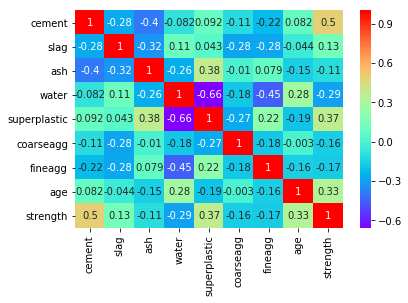

In [13]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='rainbow')

<font color='blue'> Correlation heatmap also validates our pairplot visualization observations</font>

<font color=blue><b>Let's look at scatterplot visualization now.<b></font>

In [14]:
def plot_scatter(x,y,target,data):
    fig = plt.figure(figsize=(13,8))
    ax = fig.add_subplot(111)
    plt.scatter(data[x],data[y],c=data[target],s=data[target]*3)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    lab = plt.colorbar()
    lab.set_label(target)
    plt.title("scatter plot between "+ x +" and "+y)
    plt.grid(True,alpha=.3)
    plt.show()

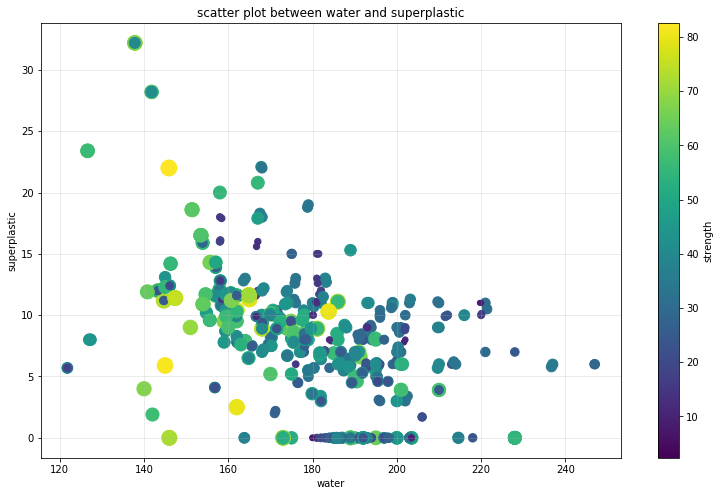

In [15]:
plot_scatter('water','superplastic','strength',df)

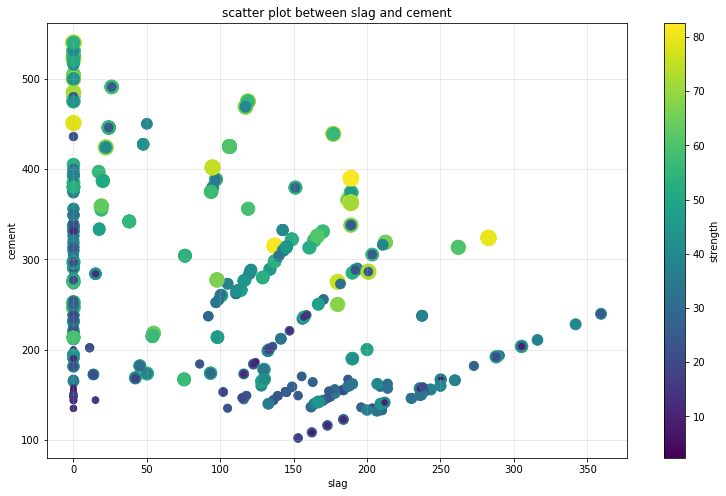

In [16]:
plot_scatter('slag','cement','strength',df)

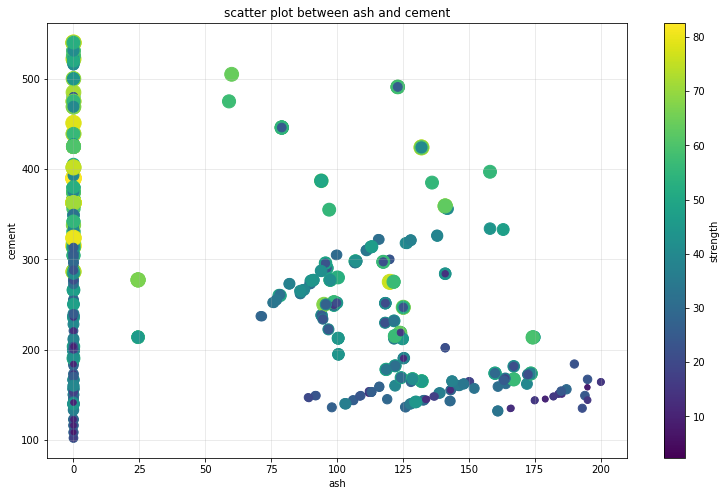

In [17]:
plot_scatter('ash','cement','strength',df)

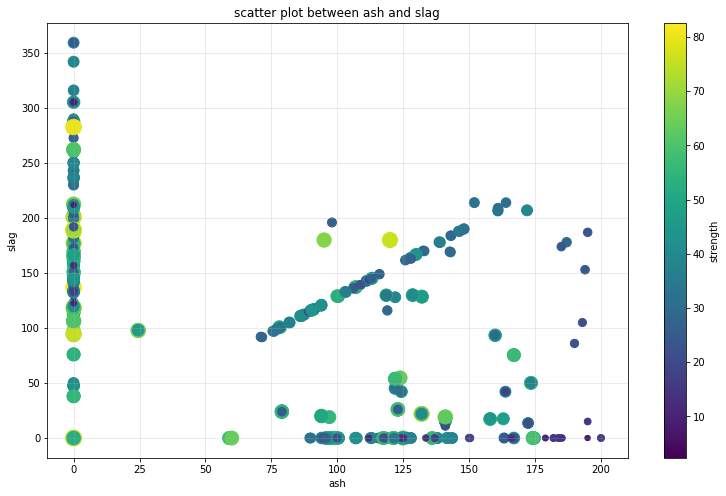

In [18]:
plot_scatter('ash','slag','strength',df)

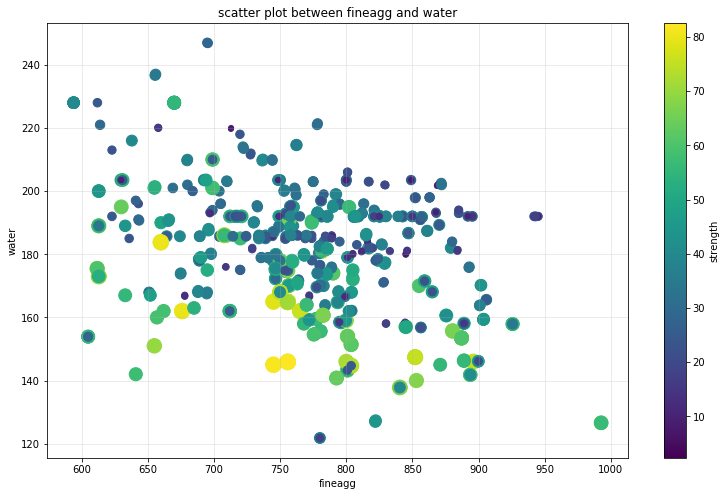

In [19]:
plot_scatter('fineagg','water','strength',df)

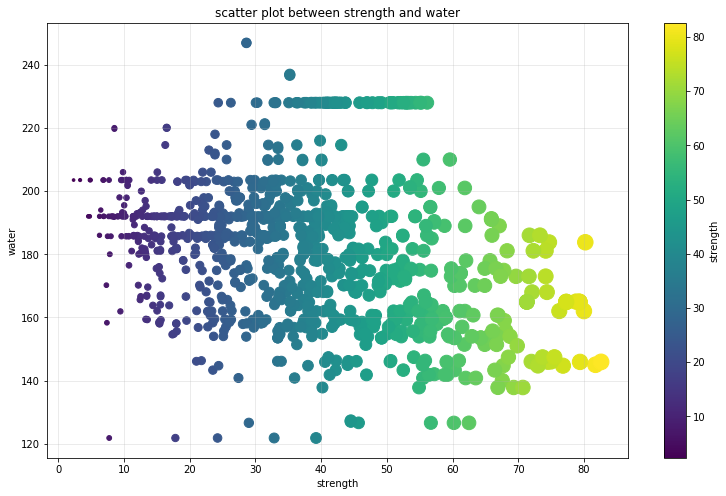

In [20]:
plot_scatter('strength','water','strength',df)

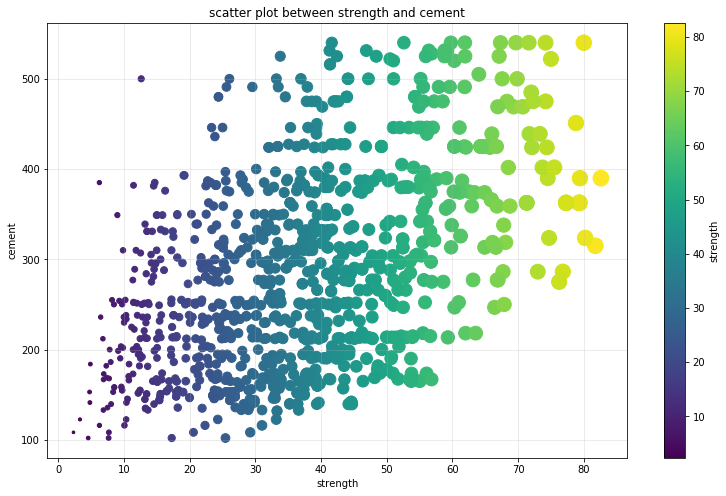

In [21]:
plot_scatter('strength','cement','strength',df)

In [22]:
def label(df):
    if df["age"] <= 30:
        return "1 month"
    if df["age"] > 30 and df["age"] <= 60 :
        return "2 months"
    if df["age"] > 60 and df["age"] <= 90 :
        return "3 months"
    if df["age"] > 90 and df["age"] <= 120 :
        return "4 months"
    if df["age"] > 120 and df["age"] <= 150 :
        return "5 months"
    if df["age"] > 150 and df["age"] <= 180 :
        return "6 months"
    if df["age"] > 180 and df["age"] <= 210 :
        return "7 months"
    if df["age"] > 210 and df["age"] <= 240 :
        return "8 months"
    if df["age"] > 240 and df["age"] <= 270 :
        return "9 months"
    if df["age"] > 270 and df["age"] <= 300 :
        return "10 months"
    if df["age"] > 300 and df["age"] <= 330 :
        return "11 months"
    if df["age"] > 330 :
        return "12 months"
df["age_months"] = df.apply(lambda df:label(df) , axis=1)

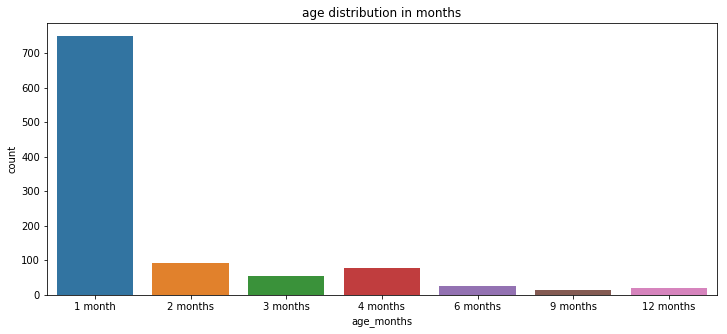

In [23]:
plt.figure(figsize=(12,5))
order = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
ax = sns.countplot(df["age_months"], order=order)
plt.title("age distribution in months")
plt.show()

<font color='blue'>from this we could see the most of the data is distributed in 1 month range</font>

## c. Data Preprocessing:

Strategies to address the different data challenges such as data pollution, outliers and missing values

<font color='blue'>We already could see there is not missing values.<br>
Value 0 on the dataset seems to be valid one, So, we won't handle 0 value as missing value for this dataset<br>
Let's look out for outliers as from univariate analysis, we found in above observations that the below attributes in <br>
our dataset has outliers.<br>
<br>

<b>Slag, Water, Superplastic, Fineagg, Age and strength</font>

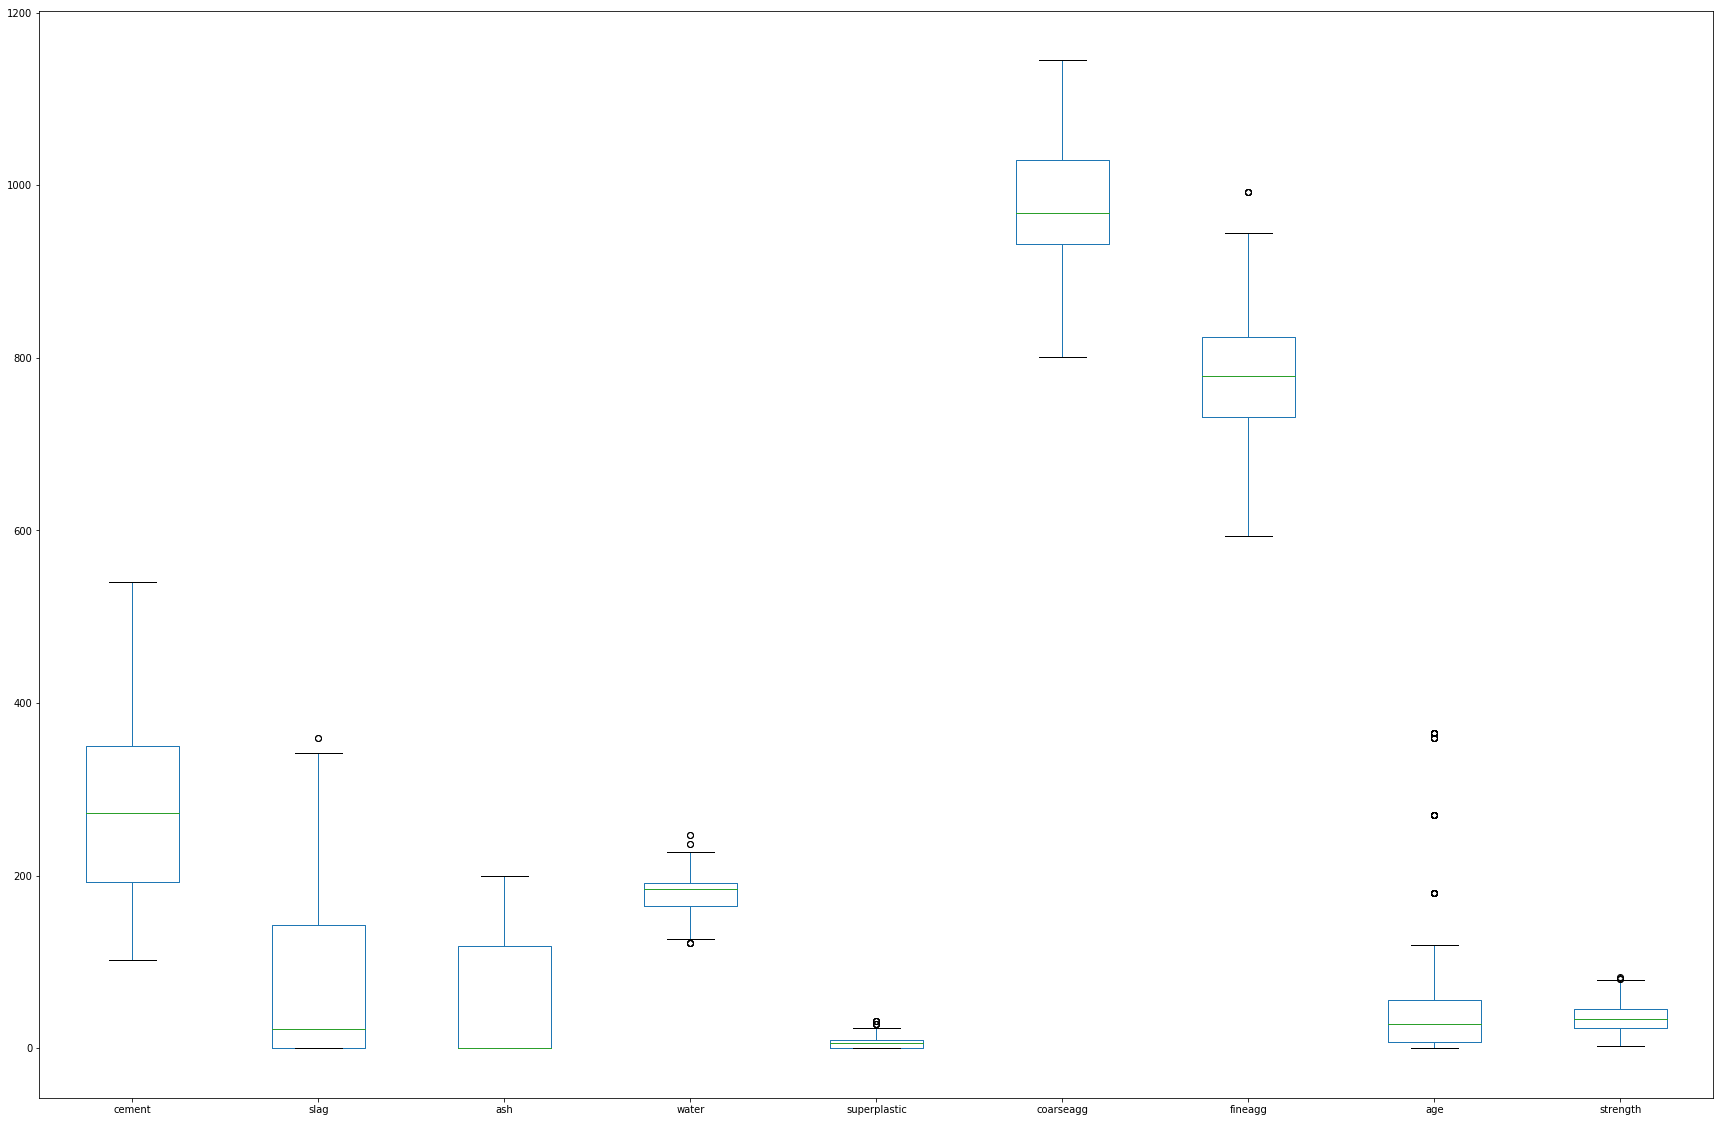

In [24]:
df.plot.box(figsize=(30,20))
plt.show()

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR)

In [26]:
ub_lb_data = pd.DataFrame({'columns':upper_bound.index, 'upper_bound':upper_bound.values,'lower_bound':lower_bound.values,'IQR':IQR.values})

In [27]:
ub_lb_data

,columns,upper_bound,lower_bound,IQR
0,cement,586.4375,-44.0625,157.625
1,slag,357.3750,-214.4250,142.950
2,ash,295.7500,-177.4500,118.300
3,water,232.6500,124.2500,27.100
4,superplastic,25.5000,-15.3000,10.200
5,coarseagg,1175.5000,785.9000,97.400
6,fineagg,963.5750,591.3750,93.050
7,age,129.5000,-66.5000,49.000
8,strength,79.7725,-9.9275,22.425


In [28]:
df_outlier = df.copy()

In [29]:
df_outlier.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'age_months'],
      dtype='object')

In [30]:
median = (df_outlier.loc[df_outlier.slag < ub_lb_data[ub_lb_data['columns']=='slag']['upper_bound'].values[0], 'slag'].median() + df_outlier.loc[df_outlier.slag > ub_lb_data[ub_lb_data['columns']=='slag']['lower_bound'].values[0], 'slag'].median()) / 2
df_outlier.loc[df_outlier.slag > ub_lb_data[ub_lb_data['columns']=='slag']['upper_bound'].values[0], 'slag'] = np.nan
df_outlier.loc[df_outlier.slag < ub_lb_data[ub_lb_data['columns']=='slag']['lower_bound'].values[0], 'slag'] = np.nan
df_outlier.fillna(median,inplace=True)

median=0

median = (df_outlier.loc[df_outlier['water'] < ub_lb_data[ub_lb_data['columns']=='water']['upper_bound'].values[0], 'water'].median() + df_outlier.loc[df_outlier['water'] > ub_lb_data[ub_lb_data['columns']=='water']['lower_bound'].values[0], 'water'].median()) / 2
df_outlier.loc[df_outlier['water'] > ub_lb_data[ub_lb_data['columns']=='water']['upper_bound'].values[0], 'water'] = np.nan
df_outlier.loc[df_outlier['water'] < ub_lb_data[ub_lb_data['columns']=='water']['lower_bound'].values[0], 'water'] = np.nan
df_outlier.fillna(median,inplace=True)

median=0

median = (df_outlier.loc[df_outlier['superplastic'] < ub_lb_data[ub_lb_data['columns']=='superplastic']['upper_bound'].values[0], 'superplastic'].median() + df_outlier.loc[df_outlier['superplastic'] > ub_lb_data[ub_lb_data['columns']=='superplastic']['lower_bound'].values[0], 'superplastic'].median()) / 2
df_outlier.loc[df_outlier['superplastic'] > ub_lb_data[ub_lb_data['columns']=='superplastic']['upper_bound'].values[0], 'superplastic'] = np.nan
df_outlier.loc[df_outlier['superplastic'] < ub_lb_data[ub_lb_data['columns']=='superplastic']['lower_bound'].values[0], 'superplastic'] = np.nan
df_outlier.fillna(median,inplace=True)

median=0

median = (df_outlier.loc[df_outlier['fineagg'] < ub_lb_data[ub_lb_data['columns']=='fineagg']['upper_bound'].values[0], 'fineagg'].median() + df_outlier.loc[df_outlier['fineagg'] > ub_lb_data[ub_lb_data['columns']=='fineagg']['lower_bound'].values[0], 'fineagg'].median()) / 2
df_outlier.loc[df_outlier['fineagg'] > ub_lb_data[ub_lb_data['columns']=='fineagg']['upper_bound'].values[0], 'fineagg'] = np.nan
df_outlier.loc[df_outlier['fineagg'] < ub_lb_data[ub_lb_data['columns']=='fineagg']['lower_bound'].values[0], 'fineagg'] = np.nan
df_outlier.fillna(median,inplace=True)

median=0

median = (df_outlier.loc[df_outlier['age'] < ub_lb_data[ub_lb_data['columns']=='age']['upper_bound'].values[0], 'age'].median() + df_outlier.loc[df_outlier['age'] > ub_lb_data[ub_lb_data['columns']=='age']['lower_bound'].values[0], 'age'].median()) / 2
df_outlier.loc[df_outlier['age'] > ub_lb_data[ub_lb_data['columns']=='age']['upper_bound'].values[0], 'age'] = np.nan
df_outlier.loc[df_outlier['age'] < ub_lb_data[ub_lb_data['columns']=='age']['lower_bound'].values[0], 'age'] = np.nan
df_outlier.fillna(median,inplace=True)

median=0

median = (df_outlier.loc[df_outlier['strength'] < ub_lb_data[ub_lb_data['columns']=='strength']['upper_bound'].values[0], 'strength'].median() + df_outlier.loc[df_outlier['strength'] > ub_lb_data[ub_lb_data['columns']=='strength']['lower_bound'].values[0], 'strength'].median()) / 2
df_outlier.loc[df_outlier['strength'] > ub_lb_data[ub_lb_data['columns']=='strength']['upper_bound'].values[0], 'strength'] = np.nan
df_outlier.loc[df_outlier['strength'] < ub_lb_data[ub_lb_data['columns']=='strength']['lower_bound'].values[0], 'strength'] = np.nan
df_outlier.fillna(median,inplace=True)

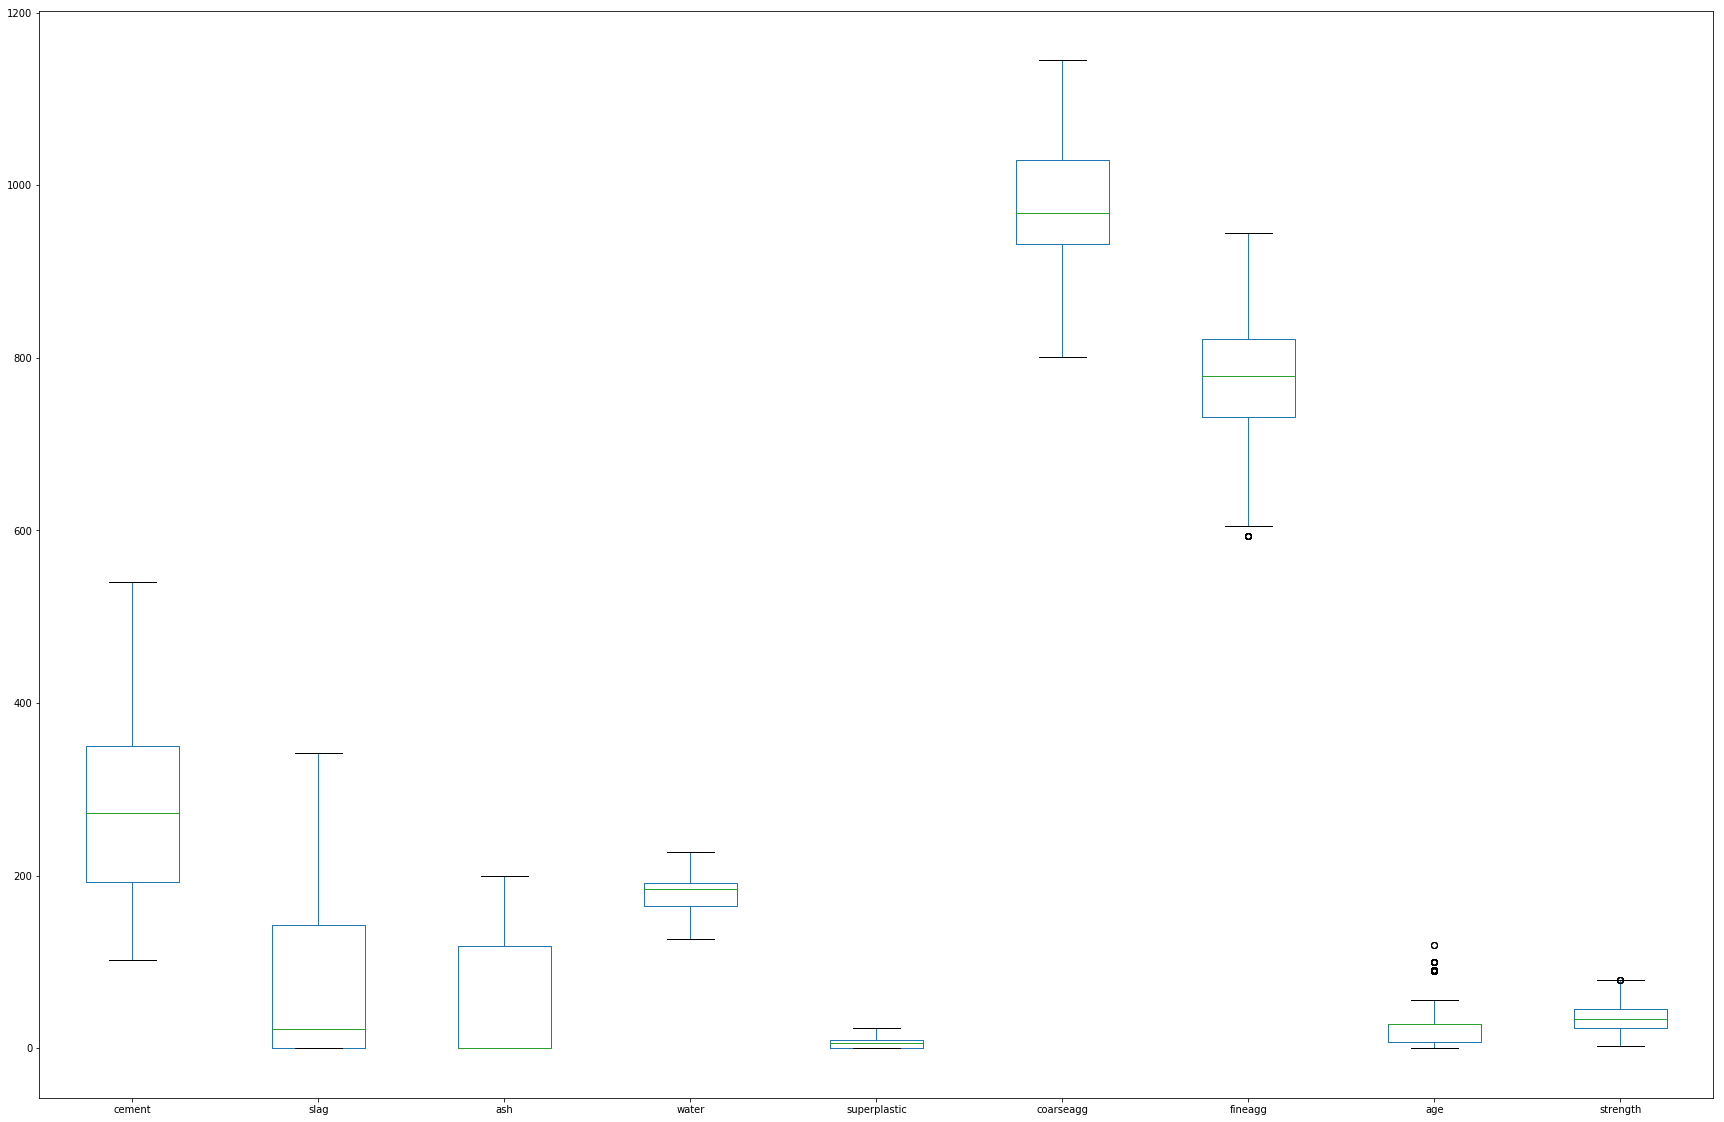

In [31]:
df_outlier.plot.box(figsize=(30,20))
plt.show()

<font color=blue><b>We have taken care of quite a handful of outliers now</font>

# 4. Feature Engineering techniques

## a. Identify opportunities (if any) to create a composite feature, drop a feature

In [32]:
df_copy = df_outlier.copy()
df_copy = df_copy.drop('age_months',axis=1)
df_copy.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


In [33]:
X = df_copy.iloc[:,0:8]  #independent columns
y = df_copy.iloc[:,-1]   #target column

[0.26688303 0.08543387 0.04334525 0.10020991 0.08084669 0.02908828
 0.03415174 0.36004124]


C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


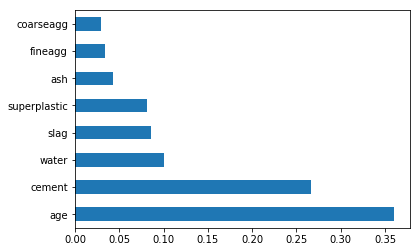

In [34]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<font color=blue>From above feature importance  bar chart we could easily drop coarseagg, ash and fineagg attributes
while building our model </font>

## b. Model Complexity Decision:

Decide on complexity of the model, should it be simple linear mode in terms of parameters or would a quadratic or higher degree help

<font color=blue> Let's first scale our independent attributes </font>

In [35]:
from scipy.stats import zscore
X_z = X.apply(zscore)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_z, y, test_size=0.3, random_state=42)

In [38]:
def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"

    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)

    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))

    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))

In [39]:
create_polynomial_regression_model(degree=1)

The model performance for the training set
-------------------------------------------
RMSE of training set is 8.909574430275846
R2 score of training set is 0.7176998504296549


The model performance for the test set
-------------------------------------------
RMSE of test set is 9.205968405311499
R2 score of test set is 0.654991214607422


In [40]:
create_polynomial_regression_model(degree=2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 6.248683960852474
R2 score of training set is 0.8611409123050151


The model performance for the test set
-------------------------------------------
RMSE of test set is 7.677325213186108
R2 score of test set is 0.760055350731547


In [41]:
create_polynomial_regression_model(degree=3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.107201400649743
R2 score of training set is 0.9400085738188064


The model performance for the test set
-------------------------------------------
RMSE of test set is 8.237633299868833
R2 score of test set is 0.7237539322557733


In [42]:
create_polynomial_regression_model(degree=4)

The model performance for the training set
-------------------------------------------
RMSE of training set is 2.038916607713497
R2 score of training set is 0.9852158583672992


The model performance for the test set
-------------------------------------------
RMSE of test set is 133.52859518589912
R2 score of test set is -71.58380881579004


<font color=blue><b> We could see RMSE is decreasing with the increase in degree of polynomial.<br>
    Also we could see R2 Score is increasing with the increase in degree of polynomial.<br>
    But in 4 degree of polynomial, we could see negative score. So we can easily discard 4 degree of polynomial.<br>
    Now, between degree=2 and degree=3, the train RMSE and R2 Score is showing good.<br>
    But test RMSE and R2 Score between degree=2 and degree=3 is not showing favourable in higher degree.<br>
    So, I would choose Polynomial Linear regression with degree=2 to fit the model.</font>

## c. Explore Guassion:

If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

In [43]:
from sklearn.cluster import KMeans

In [44]:
cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(df_copy)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,2.774288e+07
1,3,2.140319e+07
2,4,1.867926e+07
3,5,1.656661e+07


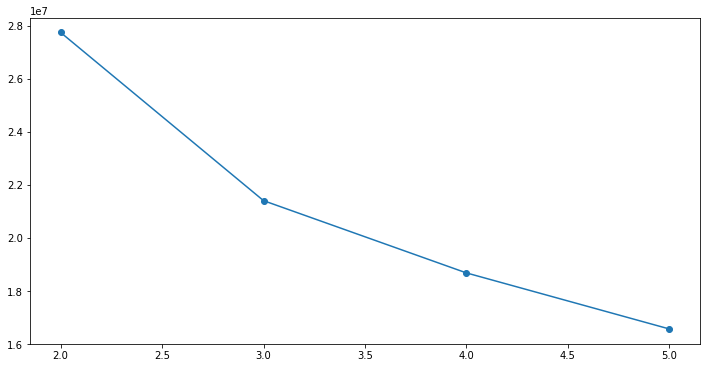

In [45]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

<font color='blue'><b> The elbow plot shows that there are likely 3 or 4 good clusters.</font>

In [46]:
X_z_copy = X_z.copy()
cluster = KMeans( n_clusters = 3, random_state = 102)
cluster.fit(X_z_copy)

prediction=cluster.predict(X_z_copy)
X_z_copy["group"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

In [47]:
centroids = cluster.cluster_centers_
centroids

array([[-0.62393296, -0.40853154,  1.13725928, -0.2736578 ,  0.49313709,
         0.08998771,  0.23516216,  0.12650897],
       [ 0.11062841,  0.11160484, -0.79196834,  0.68094369, -0.92576311,
         0.26039951, -0.28932513, -0.1076836 ],
       [ 0.92598141,  0.52419935, -0.45040328, -0.91951701,  1.02539327,
        -0.71283387,  0.17006328, -0.00905006]])

In [49]:
centroid_df = pd.DataFrame(centroids, columns = list(X_z) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-0.623933,-0.408532,1.137259,-0.273658,0.493137,0.089988,0.235162,0.126509
1,0.110628,0.111605,-0.791968,0.680944,-0.925763,0.260400,-0.289325,-0.107684
2,0.925981,0.524199,-0.450403,-0.919517,1.025393,-0.712834,0.170063,-0.009050


In [50]:
X_z_copy.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,group
0,-1.339017,1.625902,-0.847144,1.060879,-1.090960,-0.014398,-0.305670,-0.153159,1
1,-1.074790,-0.363717,1.096078,-1.134020,0.881850,1.388141,0.300699,-0.656933,0
2,-0.298384,-0.858192,0.648965,0.279067,-0.086288,-0.206121,1.126988,-0.153159,0
3,-0.145209,0.477594,-0.847144,2.250592,-1.090960,-0.526517,-1.303573,-0.153159,1
4,-1.209776,1.290784,-0.847144,0.565570,0.571315,0.958372,-0.964159,-0.153159,1
5,-0.250517,-0.858192,-0.847144,0.502442,-1.090960,-1.069519,2.192265,2.077843,1
6,-1.094894,2.073508,-0.847144,1.060879,-1.090960,0.034498,-1.016279,-0.908821,1
7,-0.284981,-0.858192,1.002278,0.332483,0.078113,0.713893,-0.188718,0.854391,0
8,0.141995,-0.858192,-0.847144,0.502442,-1.090960,1.442184,-0.095920,-0.153159,1
9,-1.207861,1.297814,1.388421,0.599562,0.553048,-1.195619,-0.934921,-0.153159,0


<font color=blue>This is new dataframe along with labels (group)</font>

# 5. Model Creation:

a. Obtain feature importance for the individual features using multiple methods and present your findings

[0.33120213 0.08126436 0.01144599 0.12915877 0.04780089 0.03797117
 0.03839542 0.32276127]


C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


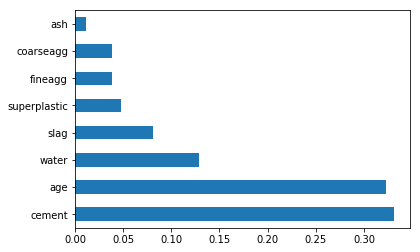

In [57]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X,y)
print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.33883621 0.08088429 0.00715782 0.1658825  0.08371533 0.00486279
 0.02593942 0.29272165]


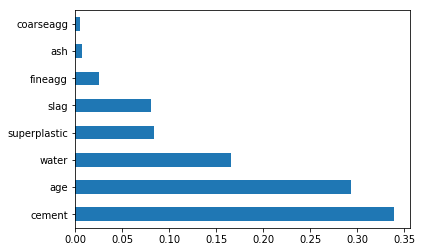

In [59]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X,y)
print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.22963625 0.08432211 0.04368378 0.10371782 0.0851338  0.04361261
 0.04717536 0.36271826]


C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


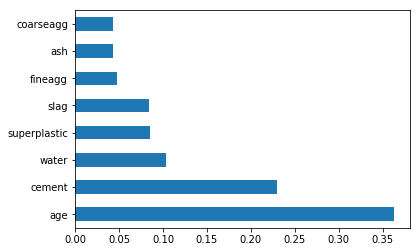

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<font color='blue'><b> In all above methods we could see less important features are coarseagg, ash and fineagg.<br>
Hence we will remove this in our modelling</font>

In [112]:
from sklearn.model_selection import cross_val_score

target = "strength"
def model(algorithm,X_train,y_train,X_test,y_test,coef_or_feat,poly=False):
    
    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(X_train,y_train)
    if poly:
        prediction = algorithm.predict(poly_features.fit_transform(X_test))
    else:
        prediction = algorithm.predict(X_test)
    
    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(y_test,prediction)) )
    print ("***************************************************************************")
    print ("R2 score:",r2_score(y_test,prediction))
    print ("***************************************************************************")
    prediction = pd.DataFrame(prediction)
    cross_val = cross_val_score(algorithm,X_train,y_train,cv=20,scoring="neg_mean_squared_error")
    cross_val = cross_val.ravel()
    print ("CROSS VALIDATION SCORE")
    print ("************************")
    print ("cv-mean :",cross_val.mean())
    print ("cv-std  :",cross_val.std())
    print ("cv-max  :",cross_val.max())
    print ("cv-min  :",cross_val.min())
    
    plt.figure(figsize=(8,5))
        
    if coef_or_feat == "coef":
        coef = pd.DataFrame(algorithm.coef_.ravel())
        coef["feat"] = X_train.columns
        ax1 = sns.barplot(coef["feat"],coef[0],linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax1.set_facecolor("lightgrey")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')
    
    elif coef_or_feat == "feat":
        coef = pd.DataFrame(algorithm.feature_importances_)
        coef["feat"] = X_train.columns
        ax2 = sns.barplot(coef["feat"],coef[0],linewidth=2,edgecolor="k"*coef["feat"].nunique())
        ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title('FEATURE IMPORTANCES')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 9.205968405311502
***************************************************************************
R2 score: 0.6549912146074219
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -81.65456549244014
cv-std  : 24.51304111722578
cv-max  : -49.46566041419204
cv-min  : -146.6030038472152


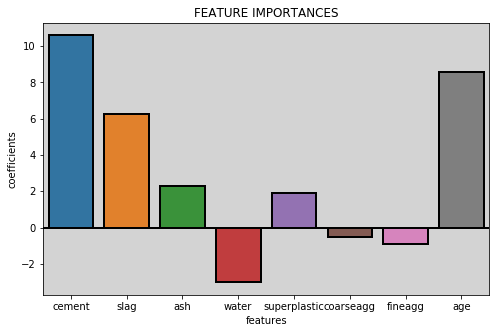

In [113]:
linear = LinearRegression()
model(linear,X_train,y_train,X_test,y_test,"coef")

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 9.35788997378229
***************************************************************************
R2 score: 0.6435102368345744
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -88.98131021808412
cv-std  : 20.215394090731415
cv-max  : -63.98369281885544
cv-min  : -137.49339911109752


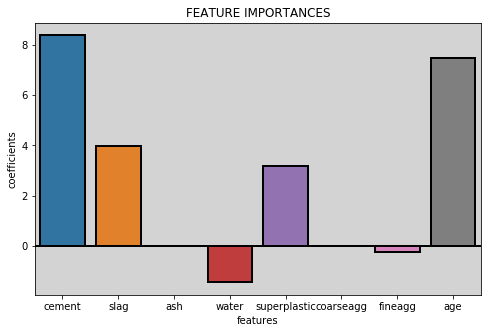

In [114]:
from sklearn.linear_model import Ridge,Lasso
lasso = Lasso()
model(lasso,X_train,y_train,X_test,y_test,"coef")

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
***************************************************************************
ROOT MEAN SQUARED ERROR : 9.201988532373743
***************************************************************************
R2 score: 0.6552894546760996
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -81.6378293142797
cv-std  : 24.468205529996755
cv-max  : -49.63021030769376
cv-min  : -146.3453596327786


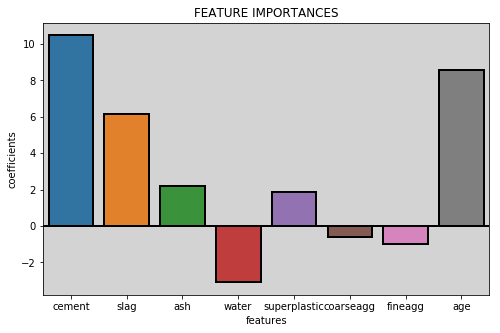

In [115]:
from sklearn.linear_model import Ridge,Lasso
ridge = Ridge()
model(ridge,X_train,y_train,X_test,y_test,"coef")

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
***************************************************************************
ROOT MEAN SQUARED ERROR : 7.946566609862038
***************************************************************************
R2 score: 0.7429306791169618
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -64.59011706291122
cv-std  : 18.23413596903533
cv-max  : -36.81251594351234
cv-min  : -107.82557591091914


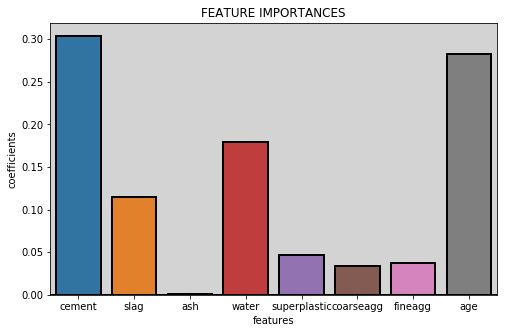

In [116]:
adaboost = AdaBoostRegressor()
model(adaboost,X_train,y_train,X_test,y_test,"feat")

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 6.839380110295958
***************************************************************************
R2 score: 0.809574687842561
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -30.13212713369212
cv-std  : 14.882146012040307
cv-max  : -11.709950159355534
cv-min  : -83.3504355354319


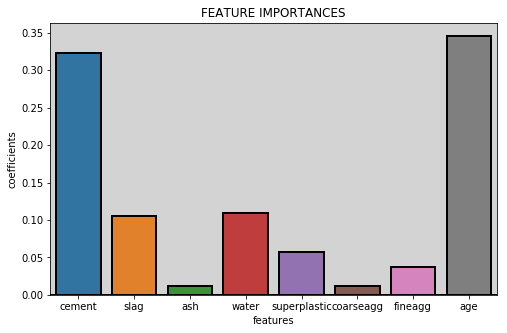

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
gradboost = GradientBoostingRegressor()
model(gradboost,X_train,y_train,X_test,y_test,"feat")

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 6.04091308409648
***************************************************************************
R2 score: 0.8514418890035202
***************************************************************************


C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CROSS VALIDATION SCORE
************************
cv-mean : -32.07108213659284
cv-std  : 17.831031142785754
cv-max  : -12.360997256944446
cv-min  : -97.81557221373455


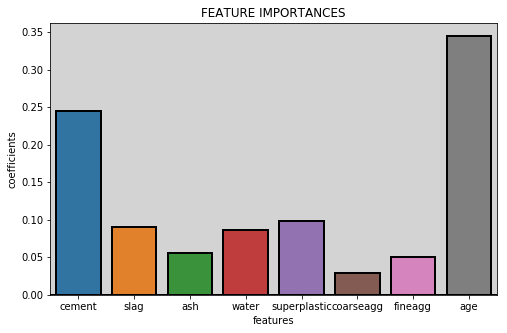

In [118]:
extratree = ExtraTreesRegressor()
model(extratree,X_train,y_train,X_test,y_test,"feat")

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=40, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 6.094502620869053
***************************************************************************
R2 score: 0.8487944506574334
***************************************************************************


C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CROSS VALIDATION SCORE
************************
cv-mean : -35.79202532224256
cv-std  : 18.146248215621352
cv-max  : -15.229101520447532
cv-min  : -99.34903731828702


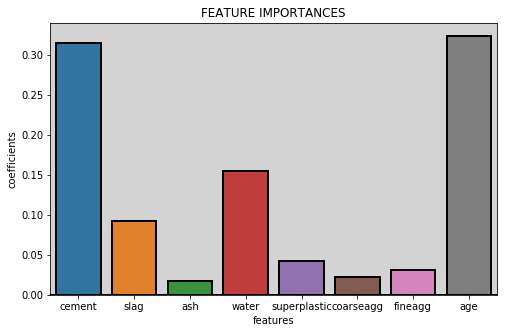

In [119]:
randomforest = RandomForestRegressor(random_state=40)
model(randomforest,X_train,y_train,X_test,y_test,"feat")

<font color='blue'>From all above models, we could see that important features are <b>Cement, slag, water, superplastic and age.<br></b> Now Let's build our model using these features only.<br>
    <br>Also we can see, <b>Random Forest Model</b> is giving good result.</font>

In [121]:
X_train_feat = X_train[['cement', 'slag', 'water', 'superplastic','age']]
X_test_feat = X_test[['cement', 'slag', 'water', 'superplastic','age']]

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=40, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 6.088593236278217
***************************************************************************
R2 score: 0.8490875339829651
***************************************************************************


C:\Users\punit\Anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CROSS VALIDATION SCORE
************************
cv-mean : -35.093847918998485
cv-std  : 18.298311596232782
cv-max  : -18.48335758033952
cv-min  : -99.10391541227922


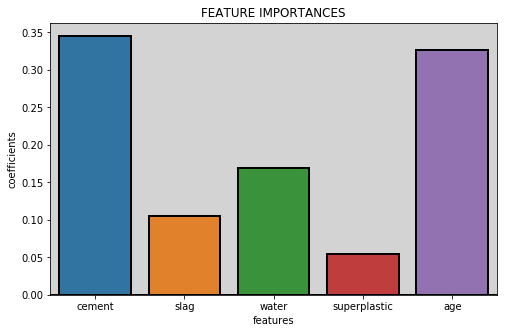

In [122]:
randomforest_feat = RandomForestRegressor(random_state=40)
model(randomforest_feat,X_train_feat,y_train,X_test_feat,y_test,"feat")

# 6. Model Tuning:

a. Algorithms that you think will be suitable for this project

<font color='blue'> Based on above modelling techniques, I would chose random forest with important feature.</font>

b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit.

<font color='blue'> Let's perform gridsearch on Random Forest and find best estimators.</font>

In [123]:
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor(random_state=40)
param_grid = { 
        "n_estimators"      : [10,20,30],
        "max_features"      : ["auto", "sqrt", "log2"],
        "min_samples_split" : [2,4,8],
        "bootstrap": [True, False],
        }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(X_train_feat, y_train)

print('best_score: ',grid.best_score_ )
print('************************************' )
print('best_score: ',grid.best_params_)

best_score:  0.879357920251864
************************************
best_score:  {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 20}


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=40, verbose=0, warm_start=False)
***************************************************************************
ROOT MEAN SQUARED ERROR : 6.049943531243435
***************************************************************************
R2 score: 0.8509974035832002
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : -29.344911297454352
cv-std  : 14.84167235702586
cv-max  : -10.456166051697545
cv-min  : -82.42171100434025


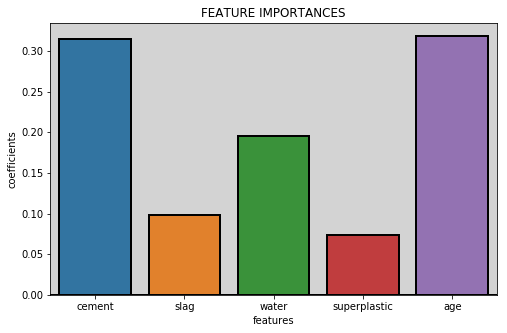

In [124]:
rand_forest_best = RandomForestRegressor(bootstrap= False, max_features= 'sqrt', min_samples_split= 2, n_estimators= 20,random_state=40)
model(rand_forest_best,X_train_feat,y_train,X_test_feat,y_test,"feat")

<font color='blue'> We could see our score improved and also rmse also improved.</font>

c. Model performance range at 95% confidence level

In [137]:
import statsmodels.api as sm

mod = sm.OLS(y, X_z)
res = mod.fit()
print(res.conf_int(0.05))   # 95% confidence interval

                     0          1
cement        4.783306  15.575127
slag          0.388183  10.870510
ash          -2.471319   7.281312
water        -8.619427   1.854707
superplastic -2.562360   5.325241
coarseagg    -4.999800   3.600164
fineagg      -6.366443   3.757956
age           6.162040  10.698250
